### Homework 3 - Semih Akmese 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [1]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=2000, n_features=3)
data = 

In [4]:
X.shape

(2000, 3)

In [5]:
y.shape

(2000,)

### Analyzing the Data

In [15]:
xdf = pd.DataFrame(X,columns=["A","B","C"])
ydf = pd.DataFrame(y,columns=["Y"])
print(xdf.head())
print(ydf.head())
# Our labels encoded by 0,1 and 2

          A         B         C
0 -4.715344 -2.148373  0.018962
1 -7.331797 -3.398327 -1.422721
2 -1.081545  1.022352 -0.010407
3  6.695939 -3.497050  7.715639
4  6.371245 -5.642156  7.683449
   Y
0  0
1  0
2  1
3  2
4  2


In [11]:
xdf.info() #There is not nan value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2000 non-null   float64
 1   B       2000 non-null   float64
 2   C       2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


In [12]:
xdf.describe()

,A,B,C
count,2000.000000,2000.000000,2000.000000
mean,0.176892,-2.899059,2.232653
std,5.433852,1.512987,4.608961
min,-8.302029,-7.140275,-4.177396
25%,-4.715374,-4.003813,-1.216691
50%,-1.519584,-2.787964,-0.253692
75%,6.761139,-1.763773,7.946288
max,10.534071,1.318971,11.527546


In [18]:
print(xdf.isna().sum())
print(ydf.isna().sum())

A    0
B    0
C    0
dtype: int64
Y    0
dtype: int64


In [20]:
#To visualize our data we need to concatanate our columns and rows by using pd.concat method
data = pd.concat([xdf,ydf],axis = 1)
data.head()
#We created our data, we also created earlier data by using pd.DataFrame(X,y) method

,A,B,C,Y
0,-4.715344,-2.148373,0.018962,0
1,-7.331797,-3.398327,-1.422721,0
2,-1.081545,1.022352,-0.010407,1
3,6.695939,-3.497050,7.715639,2
4,6.371245,-5.642156,7.683449,2


In [47]:
#Lets check our data is balanced or not
data.groupby(by="Y").count()
#Yes we can say that the data balanced

,A,B,C
Y,,,
0,667,667,667
1,667,667,667
2,666,666,666


In [24]:
data.groupby(by="Y").mean()

,A,B,C
Y,,,
0,-5.378103,-2.501707,-1.128361
1,-1.480942,-1.720738,-0.757515
2,7.400551,-4.477097,8.593371


### Outlier Detection

- 1st Quartile = Q1
- 2nd Quartile = Q2 (Median)
- 3nd Quartile = Q3
- IQR = Q3-Q1
- Outliers must be smaller than Q1 - 1.5IQR or bigger than Q3 + 1.5IQR
- For good machine learning model we should drop outliers

In [39]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [40]:
data.loc[detect_outliers(data,["A","B","C"])] #As we see there is no outlier value

,A,B,C,Y


In [42]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(xdf)
X_scaled

array([[-0.90055081,  0.49628531, -0.48042153],
       [-1.38218095, -0.33007111, -0.79329986],
       [-0.23164988,  2.59248119, -0.48679528],
       ...,
       [-0.21999859,  0.78231575, -0.53653066],
       [ 1.34404358, -1.01930507,  1.011008  ],
       [-0.7836093 ,  0.6146959 , -0.81130054]])

### Visualizing the Data

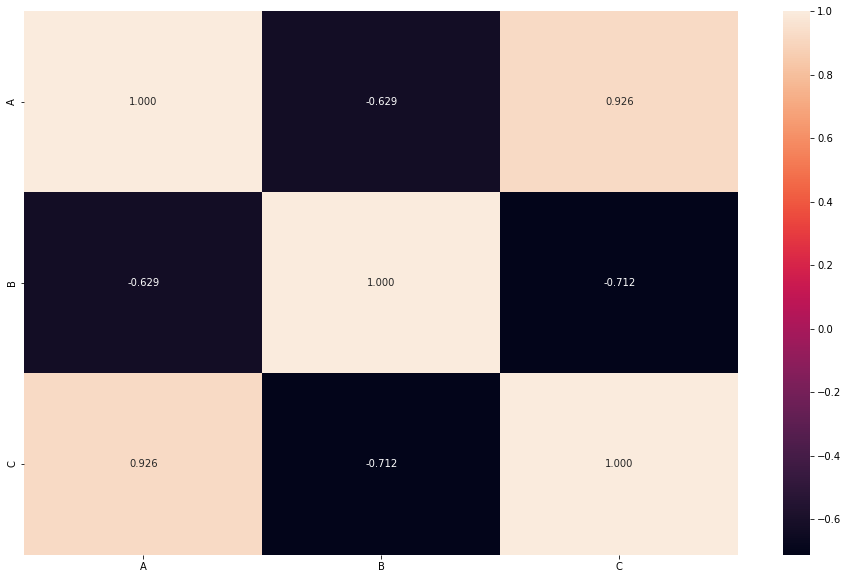

In [48]:
list1 = ["A","B","C"]
plt.figure(figsize = (16,10))
sns.heatmap(xdf[list1].corr(), annot=True, fmt=".3f")
plt.show()
#There are no high correlated features thats why we don't need to drop any of them


In [50]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var= data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values) #With this command we can limit the ticks  
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

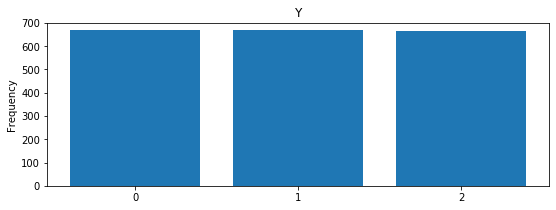

Y: 
 1    667
0    667
2    666
Name: Y, dtype: int64


In [52]:
#Categorical Variable
category1=["Y"]
for c in category1:
    bar_plot(c)

In [55]:
#Numerical Variable
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(data[variable],bins=100)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distrubution with hist".format(variable))
    plt.show()

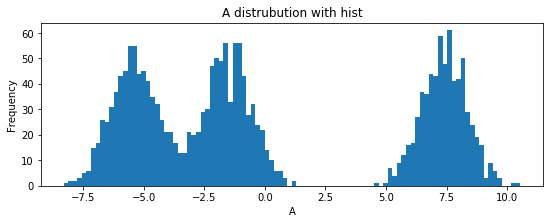

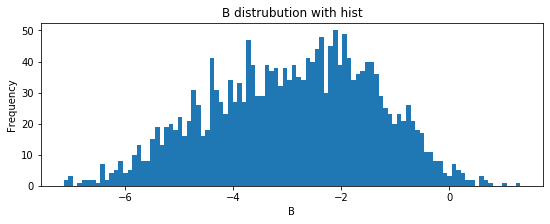

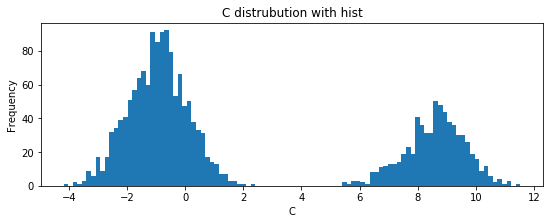

In [56]:
numericVar = ["A","B","C"]
for n in numericVar:
    plot_hist(n)

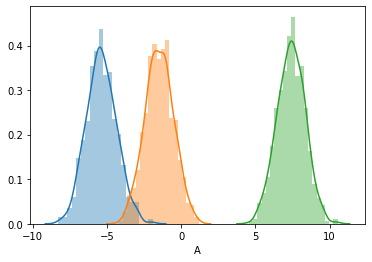

In [85]:
for i in range(0,3):
    sns.distplot(data[data.Y == i].A)

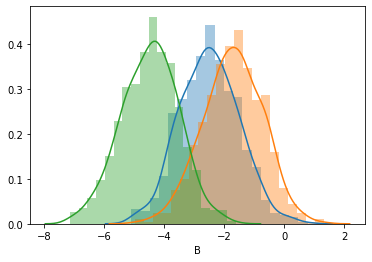

In [70]:
for i in range(0,3):
    sns.distplot(data[data.Y == i].B)

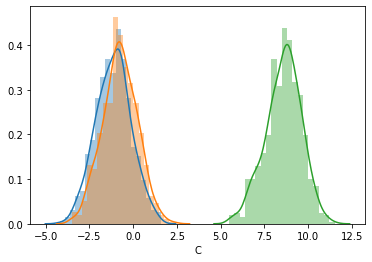

In [71]:
for i in range(0,3):
    sns.distplot(data[data.Y == i].C)    

In [72]:
# We showed our distrubition by 2 ways.

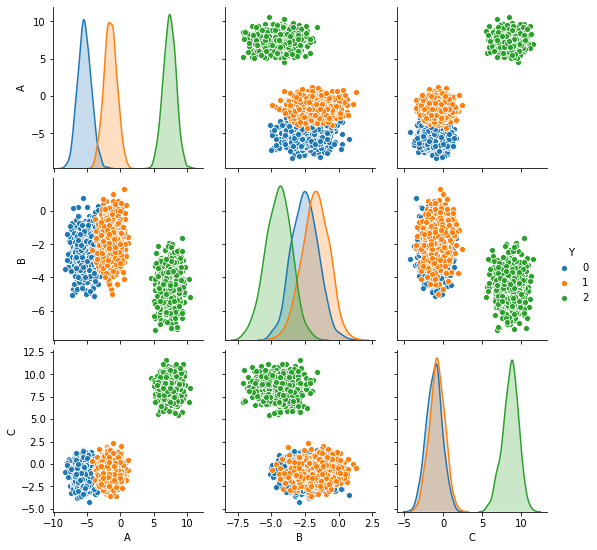

In [77]:
sns.pairplot(data,hue="Y")

#### Splitting the Data

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)

### Creating the Model

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =6, random_state = 42)
clf.fit(X_train,y_train)
print("Accuracy of train = ",clf.score(X_train,y_train))
print("Accuracy of train = ",clf.score(X_test,y_test))

Accuracy of train =  0.9964285714285714
Accuracy of train =  0.9833333333333333


In [117]:
#Metric evaluation
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report,f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       205
           1       0.97      0.98      0.98       208
           2       1.00      1.00      1.00       187

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [118]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9839080459770115
Recall = 0.983833646028768
Accuracy = 0.9833333333333333
F1 Score = 0.9838555837007849


### XGBoost 

In [123]:
import xgboost as xgb

In [125]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [131]:
parameters ={"max_depth": 2,
            "eta":0.5,
            "verbosity":2,
            "objective":"multi:softprob", 
            "num_class":3}
num_round = 5
model = xgb.train(parameters,dmatrix_train,num_round)

[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:18:09] INFO: src/tree/updater_prune.cc:74: tree pruning end,

In [132]:
preds = model.predict(dmatrix_test)
preds[:5]

array([[0.03222083, 0.9363795 , 0.03139965],
       [0.03222083, 0.9363795 , 0.03139965],
       [0.02792864, 0.02758569, 0.94448566],
       [0.02792864, 0.02758569, 0.94448566],
       [0.02792864, 0.02758569, 0.94448566]], dtype=float32)

In [133]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1,
       2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1,
       0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2,
       2, 1, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 0, 2,
       2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2,

#### With XGBoost Algorithm

In [136]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test, best_preds,average='macro')))

Precision = 0.9906542056074766
Recall = 0.9902439024390244
Accuracy = 0.99
F1 Score = 0.990310168457604


#### Without XGBoost Algorithm

In [139]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9839080459770115
Recall = 0.983833646028768
Accuracy = 0.9833333333333333
F1 Score = 0.9838555837007849


The model evaluated in better way (Not the same results), there is no overfitting.


#### Grid Search CV - Hyperparameter Tuning

In [143]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000,5000]
}
    
xgc = XGBClassifier(booster='gbtree', learning_rate =0.005, n_estimators=50, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000}
Mean of the cv scores is 0.984289
Train Score 1.000000
Test Score 0.990000
Seconds used for refitting the best model on the train dataset: 1.211915
